<a href="https://colab.research.google.com/github/abderrahmaneaziri/astar/blob/main/TP_AS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compte rendu du TP 1 d'AS**
*AZIRI Abderrahmane*

*KHADIR Nadir*


22/03/2022


# Exercice 1 :


Dans cette partie nous nous somme chargé de générer les données avec lesquelles on fera usage pour pour appliquer notre apprentissage.

**les étapes du code :**

On commence par importer la bibliothèque numpy.
par la suite on importe  matplotlib, qui est utilisé pour tracer des graphiques.

Ensuite, une fonction appelée ion() est définie qui sera utilisée plus tard à des fins de traçage interactif.
Cette fonction nous permet d'utiliser facilement plusieurs figures et tracés à la fois.

Ensuite, des nombres aléatoires sont générés à l'aide de np.random().
Ces nombres sont utilisés comme entrées dans un produit scalaire entre deux matrices : sca et rot (qui représentent respectivement la matrice de rotation et le vecteur de translation).

Après cela, les données sont créées à partir de ces trois matrices à l'aide de np.concatenate(), qui concatène toutes les valeurs ensemble dans un tableau avant d'être tracées sur une figure avec plt.scatter().

Le code générera 100 échantillons de données avec une étiquette de classe de 1 et 4x25 échantillons avec une étiquette de classe de 2.

Le code trace alors le premier groupe en rouge et le second en vert.
 

In [129]:
import numpy as np   
import matplotlib.pyplot as plt 
plt.ion() # mode interactif facilite utilisation figures multiples
np.random.seed(150)
#définir matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34], [0.34, 0.94]])  
sca = np.array([[3.4, 0], [0, 2]])
# générer données classe 1 
c1d = (np.random.randn(100,2)).dot(sca).dot(rot) 
# générer données classe 2
c2d1 = np.random.randn(25,2)+[-10, 2]  
c2d2 = np.random.randn(25,2)+[-7, -2] 
c2d3 = np.random.randn(25,2)+[-2, -6] 
c2d4 = np.random.randn(25,2)+[5, -7] 
data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))
# générer étiquettes de classe 
l1c = np.ones(100, dtype=int) 
l2c = np.zeros(100, dtype=int) 
labels = np.concatenate((l1c, l2c))

**Visualisation des données**

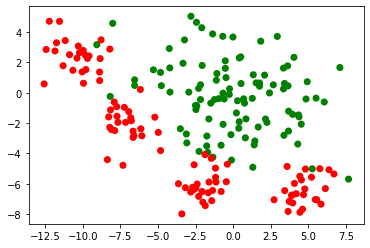

In [130]:
# les échantillons du premier groupe sont en rouge 'r', ceux du deuxième groupe en vert (*green*) 'g'
cmp = np.array(['r','g']) 
plt.figure() 
plt.scatter(data[:,0],data[:,1], c=cmp[labels], s=50, edgecolors='none')

Nous générons maintenant un premier découpage entre données d’apprentissage et données de 
test. 
Les données de test sont affichées avec cercles vides (c='none'), les données d’apprentissage 
avec des cercles remplis.

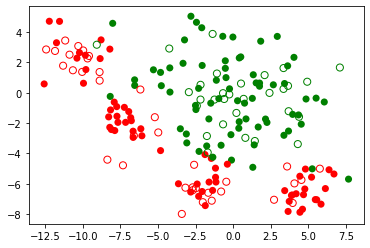

In [131]:
from sklearn.model_selection import train_test_split 
 
plt.figure() 
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, 
test_size=0.33) 
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none') 
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])

Ce qui est fait dans cette partie consiste à diviser les données en deux ensembles, X_train1 et X_test1.

Le premier ensemble est utilisé pour former un modèle sur les données d'apprentissage, tandis que le second ensemble est utilisé pour les tests (33% du dataset).

Le code trace ensuite des diagrammes de dispersion de chaque ensemble de données avec un dégradé de couleurs qui indique s'ils proviennent ou non d'ensembles de données différents.

In [132]:
print ('le nombre d\'échantillions du jeu de données d’apprentissage est de {}'.format(len(X_train1)) )

le nombre d'échantillions du jeu de données d’apprentissage est de 134


# Exercice 2 :

On commence par importer la classe LinearDiscriminantAnalysis à partir de sklearn.discriminant_analysis.
Ceci est utilisé pour créer un modèle d'analyse discriminante linéaire qui sera adapté à l'ensemble de données d'apprentissage.
Le score de ce modèle sera alors évalué et affiché sur split1 .


In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() 
 # évaluation et affichage sur split1
lda.fit(X_train1, y_train1)  
print("Le score sur le jeu d'apprentissage est de : {}".format(lda.score(X_train1, y_train1)))
print("Le score sur le jeu de test est de : {}".format(lda.score(X_test1, y_test1)))

Le score sur le jeu d'apprentissage est de : 0.835820895522388
Le score sur le jeu de test est de : 0.9393939393939394


On commence par créer une nouvelle figure sur laquelle afficher les points.
on utilise ensuite plt.scatter() pour tracer les données de X_train1 et X_test1 sur cette figure.
Nous calculons ensuite la probabilité que chaque point appartienne à chaque classe en utilisant lda.predict_proba().
Cela se fait en calculant Z comme suit : Z = Z[:, 1].reshape(xx.shape) Ceci est fait parce que nous voulons calculer la probabilité qu'un point donné appartienne à la classe 0 ou à la classe 1, pas seulement à l'une des (par exemple, s'il y a 100 points au total).
Enfin, nous utilisons plt.contour() pour tracer une ligne de contour à chaque valeur de Z où elle a une probabilité de 0,5
on produira un nuage de points des données d'apprentissage et des données de test.
Puis on calcule pour chaque point du graphique sa probabilité d'appartenir à chaque classe, puis on trace une ligne à 0,5 probabilité.

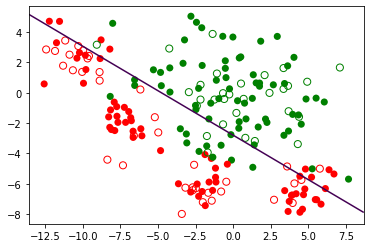

In [134]:
# on créé une nouvelle figure sur laquelle on affiche les points 
plt.figure() 
plt.scatter(X_train1[:,0], X_train1[:,1], c=cmp[y_train1], s=50, edgecolors='none') 
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])  # on calcule pour chaque point du plan sa probabilité d'appartenir à chaque classe
nx, ny = 200, 100 
x_min,  x_max  =  plt.xlim() 
y_min, y_max = plt.ylim() 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny)) 
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z[:, 1].reshape(xx.shape) 
 
# on dessine la frontière correspond à une probabilité de 0,5  plt.contour(xx, yy, Z, [0.5])
plt.contour(xx, yy, Z, [0.5]) 

On va maintenant faire le méme travail sur une valeur de test_size de 0.20 % du dataset.

Le score sur le jeu d'apprentissage est de : 0.875
Le score sur le jeu de test est de : 0.85


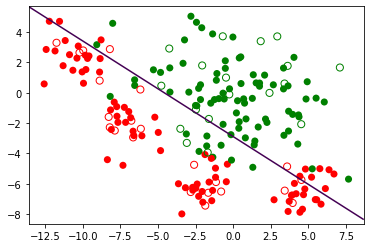

In [135]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, labels, test_size=0.20) 
lda = LinearDiscriminantAnalysis() 
# évaluation et affichage sur split1
lda.fit(X_train1, y_train1)  
print("Le score sur le jeu d'apprentissage est de : {}".format(lda.score(X_train1, y_train1)))
print("Le score sur le jeu de test est de : {}".format(lda.score(X_test1, y_test1)))
plt.figure() 
plt.scatter(X_train1[:,0], X_train1[:,1], c=cmp[y_train1], s=50, edgecolors='none') 
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1])  # on calcule pour chaque point du plan sa probabilité d'appartenir à chaque classe
nx, ny = 200, 100 
x_min,  x_max  =  plt.xlim() 
y_min, y_max = plt.ylim() 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny)) 
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z[:, 1].reshape(xx.shape) 
 
# on dessine la frontière correspond à une probabilité de 0,5  plt.contour(xx, yy, Z, [0.5])
plt.contour(xx, yy, Z, [0.5]) 

On remarque que le score du jeu d'appretissag à augmenté, ce qui est logique sachant qu'on a plus de donée pour l'apprentissage de notre modéle.
Par contre en diminuant la taille du dataset utilisé pour tester, on obtiens un score plus petit que lorsqu'on avat 33%, cela sifnifie que les donées du jeux de test ont un poids plus important, c-à-d lorsqu'une donée sort de notre modéle, elle diminue le score plus fortement.

# Exercice 3 :

On commence par importer la classe MLPClassifier depuis sklearn.neural_network .
La variable clf est ensuite initialisée avec un objet MLPClassifier qui a été adapté à un ensemble de données d'apprentissage à l'aide de l'algorithme L-BFGS et avec alpha=1e-5 .
Cela signifie que pour chaque itération, nous utiliserons 1e-5 comme taille de pas.
La méthode fit sur cette classe prend deux arguments : X_train1 et y_train1 qui sont tous deux des listes contenant respectivement toutes les caractéristiques et les étiquettes.
Il renvoie un score appelé train_score qui est égal à 0 au début car il n'y a pas encore d'étiquettes.
Après l'avoir ajusté à l'ensemble d'apprentissage, nous pouvons voir qu'il est maintenant égal à 0,975 .
Nous imprimons également ce que signifie cette valeur afin que nous puission comparer notre réponse plus tard si on le souhaite (Le score en train est de 0,975).
Après l'avoir ajusté à l'ensemble de test, nous obtenons Le score en test est de 0,9
Le programme générera un score pour l'ensemble de données d'apprentissage et un score pour l'ensemble de données de test.


In [136]:
from sklearn.neural_network import MLPClassifier  # nous utilisons ici l'algorithme L-BFGS pour optimiser le perceptron 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5)  # évaluation et affichage sur split1  
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1) 
print("Le score en train est {}".format(train_score)) 
 
test_score = clf.score(X_test1, y_test1)  
print("Le score en test est {}".format(test_score))
 


Le score en train est 0.99375
Le score en test est 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


On va maintenant visiualiser les résultats de notre analyse PMC 

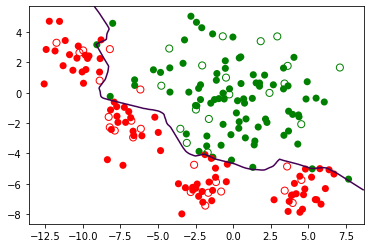

In [137]:

# créer une nouvelle figure 
plt.figure() 
# afficher les nuages de points apprentissage (remplis) et de test (vides) 
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none') 
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1]  ) 
 
# calculer la probabilité de sortie du perceptron pour tous les points du plan  
nx, ny = 200, 200  
x_min,  x_max  =  plt.xlim() 
y_min, y_max = plt.ylim() 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))  
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z[:, 1].reshape(xx.shape) 
# dessiner le contour correspondant à la frontière proba = 0,5 
plt.contour(xx, yy, Z, [0.5])

Le score en train est 0.95
Le score en test est 0.925


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


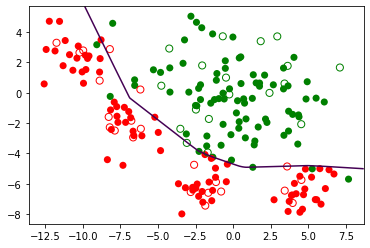

In [138]:
clf = MLPClassifier(solver='lbfgs', alpha=1)  # évaluation et affichage sur split1  
clf.fit(X_train1, y_train1)
train_score = clf.score(X_train1, y_train1) 
print("Le score en train est {}".format(train_score)) 
 
test_score = clf.score(X_test1, y_test1)  
print("Le score en test est {}".format(test_score))
# créer une nouvelle figure 
plt.figure() 
# afficher les nuages de points apprentissage (remplis) et de test (vides) 
plt.scatter(X_train1[:,0],X_train1[:,1],c=cmp[y_train1],s=50,edgecolors='none') 
plt.scatter(X_test1[:,0],X_test1[:,1],c='none',s=50,edgecolors=cmp[y_test1]  ) 
 
# calculer la probabilité de sortie du perceptron pour tous les points du plan  
nx, ny = 200, 200  
x_min,  x_max  =  plt.xlim() 
y_min, y_max = plt.ylim() 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))  
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z[:, 1].reshape(xx.shape) 
# dessiner le contour correspondant à la frontière proba = 0,5 
plt.contour(xx, yy, Z, [0.5])

En faisant varier alpha on remarque que le score du l'apprentissage est de 0.95625 pour alpha=1 et 0.96875 pour alpha =10^-5.
Pour un alpha plus petit le score d'apprentissage est meilleure en revanche pour ce qui est de la généralisation, ce n'est pas essentiellement la meme chose, en effet, on a ici pour alpha =1 un score de test de 0.975 et pour un alpha de valeur 10^-5 : 0.925 ce qui est définit comme étant l'overfitting : c'est la production d'une analyse qui correspond trop étroitement ou exactement à un ensemble particulier de données (donées de X_train) et peut donc échouer à s'adapter à des données supplémentaires (X_test) ou à prédire des observations futures de manière fiable.

#Exercice 4 :

On commence par définir deux matrices, rot et sca. Comme dans l'exercice 1, ensuite on fait le produit scalaire de la première matrice avec la seconde qui sera ensuite utilisée pour générer un tableau de données en multipliant par une matrice aléatoire de 60x2 points(60 points de données),
puis on dessine un nuage de points.
Par la suite on divise les données en deux ensembles, un pour la formation et un pour les tests (33% en données d'apprentissage).
On dessine des nuages de points des deux ensembles (avec les disques vide étant les données de test).

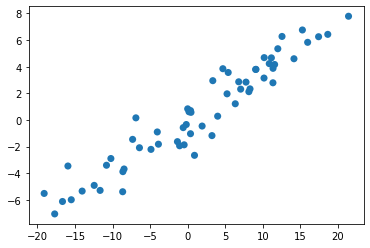

In [139]:
# définir matrices de rotation et de dilatation 
rot = np.array([[0.94, 0.34], [-0.34, 0.94]]) 
sca = np.array([[10, 0], [0, 1]]) 
# générer données bidimensionnelles 
np.random.seed(60)  
rd = np.random.randn(60,2)  
datar = rd.dot(sca).dot(rot)
 
plt.figure()  
plt.scatter(datar[:,0],datar[:,1],s=50,edgecolors='none')

Comme dans les parties précedentes, on sépare les donées en donées de test et d'apprentissage et on les dessine.

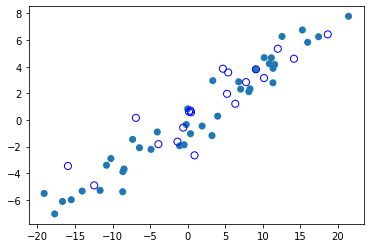

In [140]:
from sklearn.model_selection import train_test_split   
plt.figure()  
X_train1, X_test1, y_train1, y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)  
plt.scatter(X_train1,y_train1,s=50,edgecolors='none') 
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue') 

On utilise un modéle simple de regression linéaire afin de fitter nos donées.

la fonction utilisée est LinearRegression de sklearn.

Ensuite, X_train1 (transposé) et y_train1 sont passés à fit() qui entraînera le modèle sur ces ensembles de données.
le coefficient de détermination R² pour cette division dans l'ensemble de données d'entraînement 1 (X_train1).

In [141]:
from sklearn import linear_model   

reg = linear_model.LinearRegression() 
 
# évaluation et affichage sur split1  
reg.fit(X_train1.reshape(-1,1), y_train1)  
# attention, score() ici ne renvoie pas l'erreur mais la valeur du coefficient de détermination R² ! 
coeff_train = reg.score(X_train1.reshape(-1,1), y_train1)  
print("Coefficient de détermination R² en train : {}".format(coeff_train)) 
 
coeff_test = reg.score(X_test1.reshape(-1,1), y_test1)  
print("Coefficient de détermination R² en test : {}".format(coeff_train))

Coefficient de détermination R² en train : 0.9420403323870808
Coefficient de détermination R² en test : 0.9420403323870808


On obtiens une faible variation entre le coefficient de regression linéaire R².0.02 % entre les données de test et celle de l'entrainement.

Les donées sont donc fité par par la courbe (droite dessinée en noir).

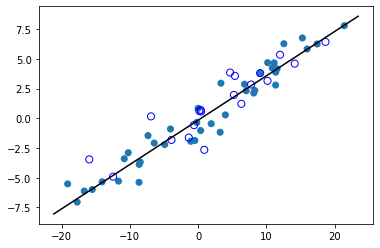

In [142]:
plt.figure()   
plt.scatter(X_train1,y_train1,s=50,edgecolors='none') 
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue') 
nx = 100 
x_min, x_max = plt.xlim()  
xx = np.linspace(x_min, x_max, nx) 
plt.plot(xx,reg.predict(xx.reshape(-1,1)),color='black')

On vas maintenant changer une des valeur de la matrice de dilatation (et2) afin d'avoir un dataset reparti différemment.

Text(0.5, 1.0, 'valeur de la regression en fonction de la valeur de et2')

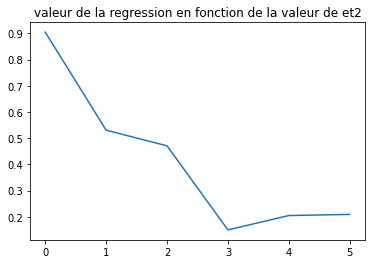

In [147]:
coefdet = []
i=1
np.random.seed(50) 
for et2 in range(1, 7):
    matrice_dilatation = np.array([[10, 0], [0, et2]])
    datar = rd.dot(matrice_dilatation).dot(rot)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(datar[:,0], datar[:,1], test_size=0.33)
    reg = linear_model.LinearRegression()
    reg.fit(X_train1.reshape(-1,1), y_train1)
    #plt.figure(i)   
    #plt.scatter(X_train1,y_train1,s=50,edgecolors='none')  
    #plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue') 
    #x_min, x_max = plt.xlim() 
    #xx = np.linspace(x_min, x_max, nx) 
    #plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')
    #plt.title('Données avec le coube de regression avec R² = {}'.format(reg.score(X_test1.reshape(-1,1), y_test1)))
    coefdet.append(reg.score(X_test1.reshape(-1,1), y_test1))
    i = i+1

plt.figure()
plt.plot(coefdet)
plt.title("valeur de la regression en fonction de la valeur de et2")

Dans cette partie, on vas fitter nos donée par la méthode MLPRegressor.

En ayant une dilatation plus prononcée ( valeur de et2 qui augmente), on a un dataset plus "étalé" donc la valeur du score de la regression linéaire diminue car les points sont de plus en plus loin de la courbe de notre modéle.

Le coefficient R² de train est 0.9422869732734886
Le coefficient R² de test est 0.9422869732734886


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


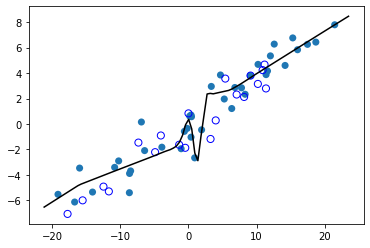

In [145]:
from sklearn.neural_network import MLPRegressor 
clf = MLPRegressor(solver='lbfgs', alpha=1e-5) 
 # évaluation et affichage sur split1  
clf.fit(X_train1.reshape(-1,1), y_train1)  
coeff_train = clf.score(X_train1.reshape(-1,1), y_train1) 
print("Le coefficient R² de train est {}".format(coeff_train)) 
coeff_test = clf.score(X_test1.reshape(-1,1), y_test1) 
print("Le coefficient R² de test est {}".format(coeff_train)) 
plt.figure()   
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')  
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue') 
x_min, x_max = plt.xlim() 
xx = np.linspace(x_min, x_max, nx) 
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Le coefficient R² pour alpha = 1 de train est 0.2671868144654953
Le coefficient R² pour alpha = 1  de test est -0.14626173197444348
Le coefficient R² pour  alpha =10^-5 de train est 0.25225552882451274
Le coefficient R² pour  alpha =10^-5 de test est -0.08002561783975604


Text(0.5, 1.0, ' Alpha = 10^-5')

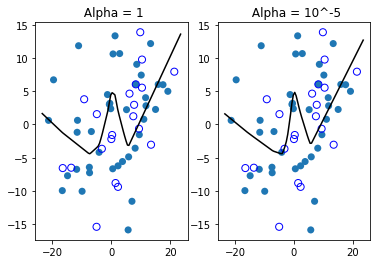

In [128]:
clf = MLPRegressor(solver='lbfgs', alpha=1) 
 # évaluation et affichage sur split1  
clf.fit(X_train1.reshape(-1,1), y_train1)  
coeff_train = clf.score(X_train1.reshape(-1,1), y_train1) 
print("Le coefficient R² pour alpha = 1 de train est {}".format(coeff_train)) 
coeff_test = clf.score(X_test1.reshape(-1,1), y_test1) 
print("Le coefficient R² pour alpha = 1  de test est {}".format(coeff_test)) 
plt.subplot(1,2,1)  
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')  
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue') 
x_min, x_max = plt.xlim() 
xx = np.linspace(x_min, x_max, nx) 
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')
plt.title(' Alpha = 1')

clf = MLPRegressor(solver='lbfgs', alpha=0.00001) 
 # évaluation et affichage sur split1  
clf.fit(X_train1.reshape(-1,1), y_train1)  
coeff_train = clf.score(X_train1.reshape(-1,1), y_train1) 
print("Le coefficient R² pour  alpha =10^-5 de train est {}".format(coeff_train)) 
coeff_test = clf.score(X_test1.reshape(-1,1), y_test1) 
print("Le coefficient R² pour  alpha =10^-5 de test est {}".format(coeff_test)) 
plt.subplot(1,2,2)    
plt.scatter(X_train1,y_train1,s=50,edgecolors='none')  
plt.scatter(X_test1,y_test1,c='none',s=50,edgecolors='blue') 
x_min, x_max = plt.xlim() 
xx = np.linspace(x_min, x_max, nx) 
plt.plot(xx,clf.predict(xx.reshape(-1,1)),color='black')
plt.title(' Alpha = 10^-5')